In [37]:
import pandas as pd
import numpy as np

In [38]:
def safe_convert(col):
    col_cleaned = col.replace(',', '', regex=True)
    return pd.to_numeric(col_cleaned, errors='coerce')

setpt = pd.read_csv('setpoint_publish(in).csv')
setpt = setpt.apply(lambda col: safe_convert(col) if col.name != 'var' else col)
setpt



,var,opt_mean,opt_sig,drift_mean,drift_sig,excursion_mean,excursion_sig
0,x1,22.1,0.295,22.111,0.442,22.115,0.5900
1,x2,44.8,1.045,46.010,1.840,46.547,2.3270
2,x4,0.4,0.023,0.368,0.027,0.304,0.0670
3,x5,150000.0,8000.000,135000.000,9000.000,120000.000,16000.0000
4,x7,1206.0,48.240,1266.300,75.978,1266.300,88.6410
5,x8,87.0,5.220,91.176,6.686,107.880,12.2264
6,x9,454.0,19.673,456.270,22.814,599.280,69.9160
7,x17,5492.0,256.293,5526.050,349.983,5552.410,425.6850


In [39]:
def generate_normal_data(mean, std_dev, size=5000, seed=None):
    return np.random.normal(loc=mean, scale=std_dev, size=size)

In [40]:
datasets = {}
for data_name in ["opt", "drift", "excursion"]:
    rows = []
    for var, mean, sig in zip(setpt['var'], setpt[f'{data_name}_mean'], setpt[f'{data_name}_sig']):
        rows.append(generate_normal_data(mean, sig, seed=42))
    
    datasets[data_name] = pd.DataFrame(np.column_stack(rows), columns=setpt['var'])

In [41]:
opt_data = datasets['opt']
drift_data = datasets['drift']
exc_data = datasets['excursion']

# Outcome 

In [42]:
opt_data['outcome'] = -( 4 * np.pi * opt_data['x1'] + (77 / 100) * (opt_data['x2'] ** 2) +
    58 * opt_data['x5'] * opt_data['x4'] - 890 * opt_data['x17'] + 33.5 * opt_data['x7'] ) / (8 * 10**5)


drift_data['outcome'] = (-( 4 * np.pi * drift_data['x1'] + (77 / 100) * (drift_data['x2'] ** 2) +
    58 * drift_data['x5'] * drift_data['x4'] - 890 * drift_data['x17'] + 33.5 * drift_data['x7'] ) / (8 * 10**5)) 
+ (19 * drift_data['x5'] * drift_data['x9'] * drift_data['x8'] / (10**11))

exc_data['outcome'] = (-( 4 * np.pi * exc_data['x1'] + (77 / 100) * (exc_data['x2'] ** 2) +
    58 * exc_data['x5'] * exc_data['x4'] - 890 * exc_data['x17'] + 33.5 * exc_data['x7'] ) / (8 * 10**5)) 
+ ((19 * exc_data['x5'] * exc_data['x9'] * exc_data['x8']) / (10**11)) 
+ ((0.8 * exc_data['x4'] * (exc_data['x5']**2) * exc_data['x17'] ) / (10**13))


0       1.788027
1       3.274361
2       2.708039
3       2.216859
4       1.631788
          ...   
4995    3.104369
4996    1.103238
4997    1.832074
4998    1.319774
4999    2.287248
Length: 5000, dtype: float64

In [43]:
opt_data.head()

var,x1,x2,x4,x5,x7,x8,x9,x17,outcome
0,21.999884,44.897291,0.409563,148528.193597,1193.782255,88.837965,461.508284,5648.243839,1.821098
1,21.812230,45.687994,0.389491,150379.457343,1218.047965,91.196584,446.680911,5412.479531,1.721598
2,22.470798,46.136922,0.388514,152201.756831,1203.649995,91.397748,473.966612,5692.641315,1.993152
3,22.583488,45.382364,0.406175,143340.039131,1206.073289,75.534844,447.660270,5780.373332,2.156790
4,22.449813,44.963766,0.370170,150970.931997,1152.274427,87.340440,490.599893,5462.592758,1.974933


In [44]:
drift_data.head()

var,x1,x2,x4,x5,x7,x8,x9,x17,outcome
0,21.106897,48.264838,0.401482,134382.669531,1488.450099,82.224895,430.923706,5585.724663,2.237676
1,22.124567,47.256501,0.349040,118235.961066,1352.807947,89.511375,426.451917,6207.572179,3.854772
2,22.011524,44.701361,0.372361,141796.446795,1288.560052,76.283360,481.356897,5550.505501,2.290753
3,22.040881,45.919037,0.398714,143329.524192,1287.021872,92.476990,413.877389,5882.795681,2.345145
4,22.523794,43.601531,0.354082,124831.893339,1229.838372,85.016502,415.335558,5349.074609,2.692612


In [45]:
exc_data.head()

var,x1,x2,x4,x5,x7,x8,x9,x17,outcome
0,21.699800,50.284039,0.293636,114437.270383,1290.672818,89.513632,548.992626,5812.181771,3.973016
1,22.481329,47.848905,0.379525,140177.817846,1280.347277,105.484795,464.427408,5488.292350,2.192479
2,22.358246,46.607262,0.357464,131311.692641,1364.354191,103.578141,655.572986,5491.940861,2.647118
3,21.420303,46.176250,0.302494,120726.981622,1186.207475,127.089014,580.925523,6285.253632,4.292644
4,21.394090,47.115315,0.247423,123968.266856,1263.439318,113.725130,571.183516,5364.282611,3.688617


In [47]:
opt_data.to_csv("data/opt_data.csv", index=None)
drift_data.to_csv("data/drift_data.csv", index=None)
exc_data.to_csv("data/excursion_data.csv", index=None)

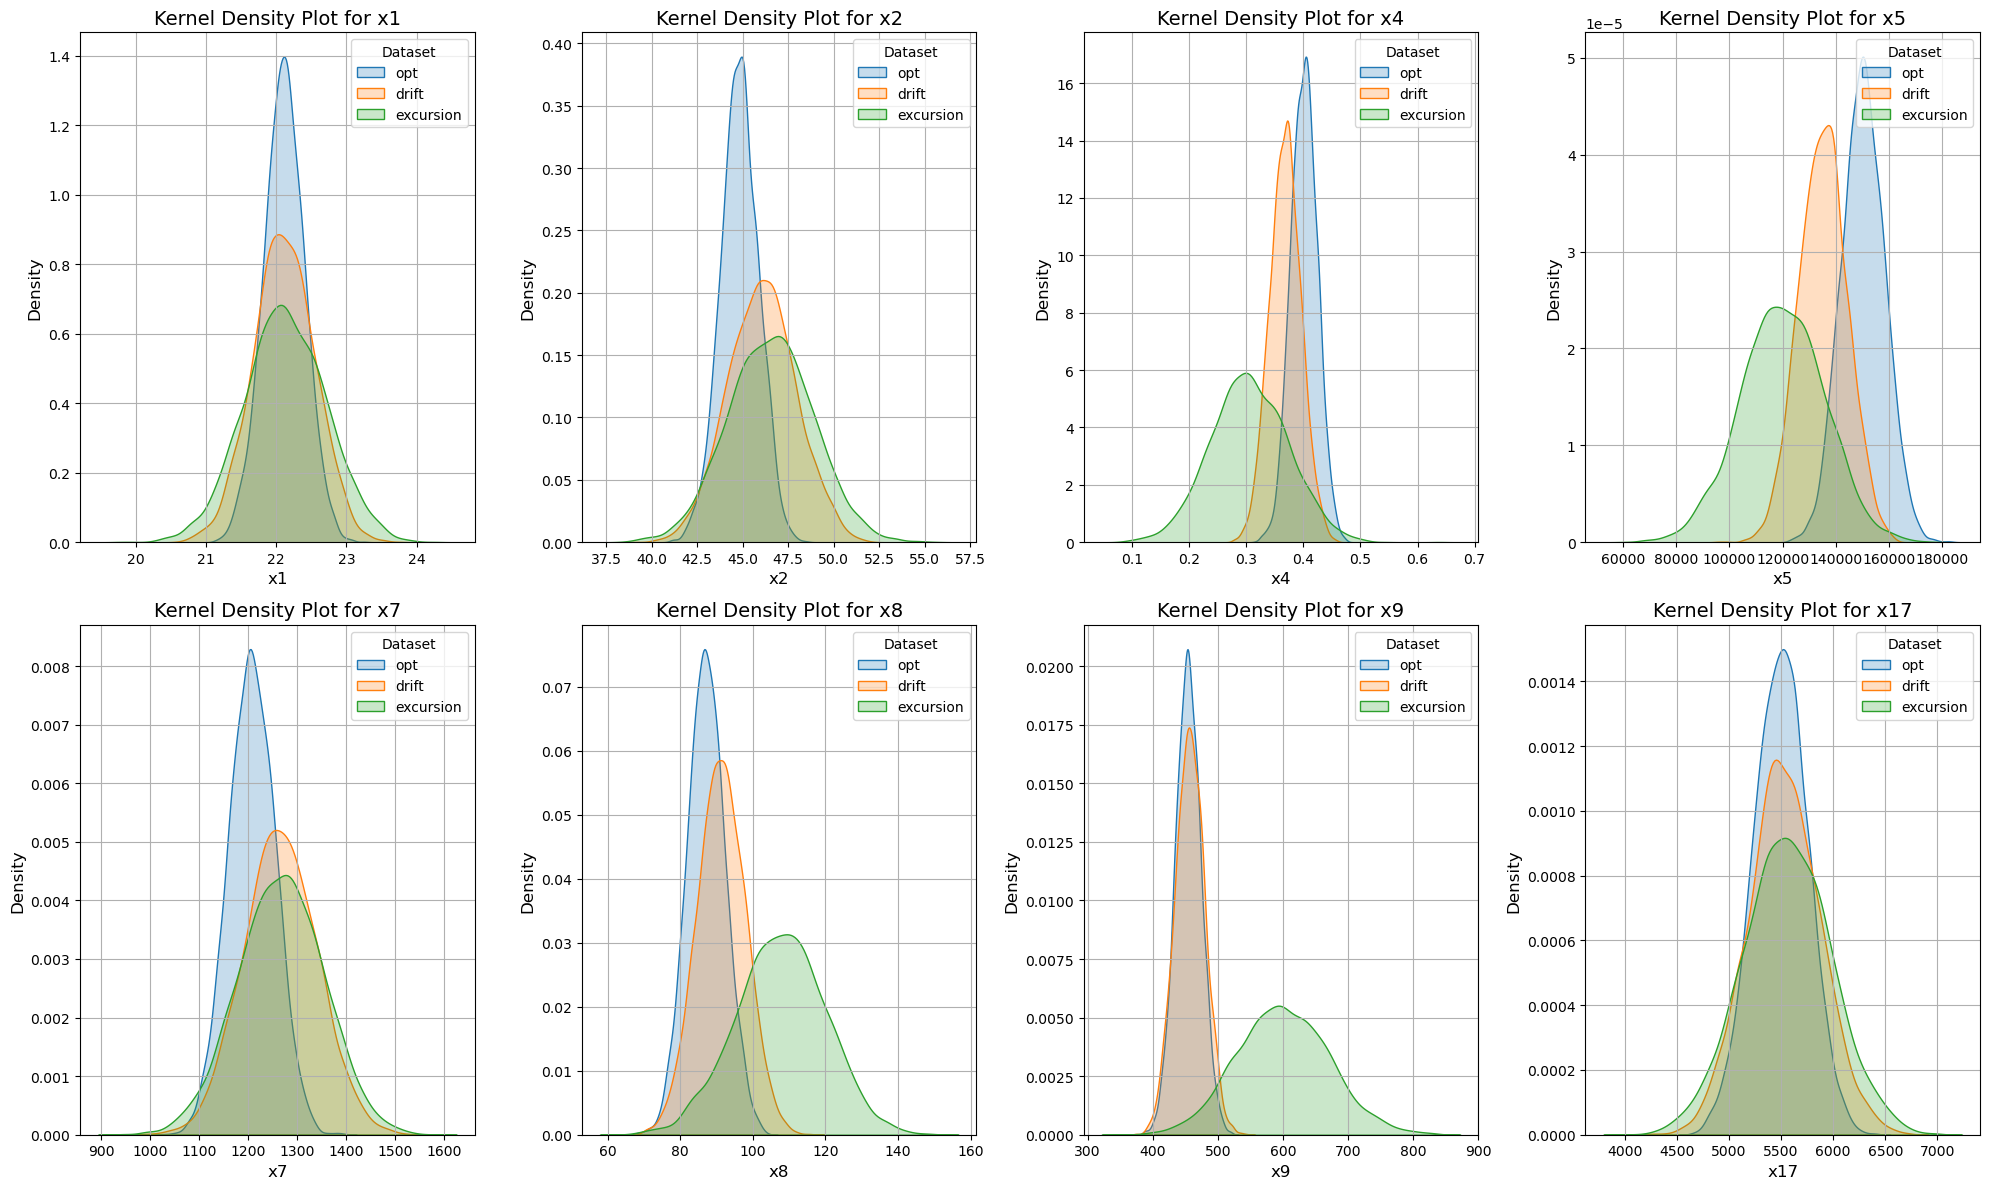

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    'opt': opt_data,
    'drift': drift_data,
    'excursion': exc_data
}

variables = opt_data.columns.drop('outcome') 

plots_per_row = 4

num_variables = len(variables)
num_rows = (num_variables + plots_per_row - 1) // plots_per_row 

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 6 * num_rows))
axes = axes.flatten()  

for i, variable in enumerate(variables):
    ax = axes[i]
    for name, df in datasets.items():
        sns.kdeplot(df[variable], label=name, fill=True, ax=ax)
    ax.set_title(f'Kernel Density Plot for {variable}', fontsize=14)
    ax.set_xlabel(variable, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(title='Dataset')
    ax.grid(True)

for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
